# Data visualization with `matplotlib`

## Recap/Intro

Here we are 4+1 lessons in and we've covered lots of basic computation ideas and `python` structures.  Here's a not-even-close-to-comprehensive, non-chronological list:
- basic mathematical operations
- iteration and recursion with loop control structures `for` and `while`
- keeping track of variables outside of loops (i.e., counting and summing)
- function definition and using functions *inside* of loops
- conditionals with `if`, `else`, and `elif`
- types: `int`, `float`, `string`
- containers such as `list` and `dict`
- randm number generation
- accessing and iterating over elements in lists and dicts
- file I/O

Today we'll look at a skill that will touch on all of the foundational skills above: Data Visualization (*i.e.*, making graphs [and other things like graphs]).  Data Visualization is one of the ways in which computing has truly changed science and society by giving humans access to new ways of understanding complex systems or relationships!  We will cover the basics of data visualization with `python`, but there is SO MUCH MORE!

## Motivation

For our motivation for this lesson, we'll look at some beautiful visualizations of quantitative information:
- Charles Joseph Minard, [*Figurative Chart of [Napoleon's retreat from Moscow]*](https://www.edwardtufte.com/tufte/minard) (1869).  [(high resolution from WikiPedia)](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)
"It may well be the best statistical graphic ever drawn." -- Edward Tufte
- Florence Nitingale, [*Diagram of the Causes of Mortality in the Army in the East*](https://99percentinvisible.org/episode/florence-nightingale-data-viz-pioneer/) (1858).  "It may well be the most important statistical graphic ever drawn." -- Mike McCracken
- Matt Daniels, [*Largest Vocabulary in Hip Hop*](https://pudding.cool/2017/02/vocabulary/) (2017).  [Warning: some vulgarities]  Poor DMX!
- Hannah Anderson and Matt Daniels, [*Film Dialogue by Gender*](https://pudding.cool/2017/03/film-dialogue/) (2016).
- New York Times, [*Coronavirus in the US*](https://www.nytimes.com/interactive/2021/us/covid-cases.html) (present)

What do these visualizations have in common?

***

## Data Visualization as an idea

A "data visualization" is a visual representation of quantitative information in some form that is intuitively digestible to human brains.  "Good" visualizations allow the user to derive understanding and meaning from quantitative information that would be otherwise unintelligible, hidden, or high-level.  "Bad" visualizations either do not allow for understanding (*i.e.*, they are confusing or unintuitive) or lead the user to a *wrong/incorrect* understanding.  Note that some (many?) visualizations are **intentionally** misleading -- a bad actor might consider a bad visualization (as defined above) to be good!

Making a good/effective visualization involves quantitive literacy, technical skill (programming in this case), creativity, artistry/style, and psychology.  That said, there seems to be a core set of *types* of data visualizations, things like time-series data, histograms, and bi-variate scatter plots.  In many cases, the understanding that we hope to gain from data can be conveyed via one of these standard types.  

That said, we now live in an era of complex, multidimensional datasets -- having more flexible visualization tools allows researchers to develop new ways to seek meaning in data, rather than having tools dictate what meaning we can seek.

### Data --> Analysis --> Evidence

The programming skills that we've learned so far form the backbone of data analysis.  With a few simple visualization tools, we will be able to turn our analyses into compelling evidence.  

#### `matplotlib`

I've mentioned before that `python` is an open-source project.
This means that many wonderful and smart people (maybe you soon!) write fabulous modules for `python` and then make this work available to the broader `python` community as modules/libraries.  Because `python` is used by so many wonderful folks in the natural and data sciences, many of these modules are designed to do *exactly* the types of things that we want to do in this class.

One such module, `matplotlib`, is a comprehensive suite for data visualization.  In this notebook, we'll use `matplotlib` to produce a few of the basic visualization types.

The [matplotlib.org](https://matplotlib.org) project homepage is a great resource, as is the [Python Graph Gallery](https://www.python-graph-gallery.com/).  The latter has some nice, short descriptions of different types of plots.

***

## Histograms

Suppose we have a dataset that is a collection of values of a *single type* (imagine a single column in a spreadsheet).
Examples would be like US household incomes from a census, or students' grades on an exam in a given class.  You might think about calculating the mean, median, and mode values of the data, but these individual values probably are not a comprehensive characterization of the data.  If I tell you that the average score on an exam was 75\%, did everyone get a 75\% or did half the class ace the exam and the other half fail???

We could certainly open the file that contains this data and just scroll through it, hoping to gain some insight about how the values are distributed, but for large datasets it's unlikely that this will yield any (correct) understanding.

A (1-d) **histogram** is a visual representation of 1-dimensional data that allows the viewer to quickly understand how the data is *distributed*.  To make a histogram, we split the full range of data values into smaller ranges called *bins* and then visualize how many values from the dataset fall into (or occupy) each bin.  You may have previously worked with bar graphs, which are closely related to histograms.  Note that this approach takes 1-d data and turns it into a 2-d representation (bin properties and occupancies).

A well-made histogram allows the user to get an idea of how data is distributed in a single glance, and it can lead to more nuanced understanding.

Histograms are very useful, and `matplotlib` has quite a bit of built-in histogram capability that will allow you to make professional plots easily!  Let's take it for a test drive!  In addition to `numpy` we'll need to import `matplotlib.pyplot`, the core plotting module.  Let's work with the `dice_data.txt` file from last lesson's homework assignment.  We'll make a simple histogram for total dice value.

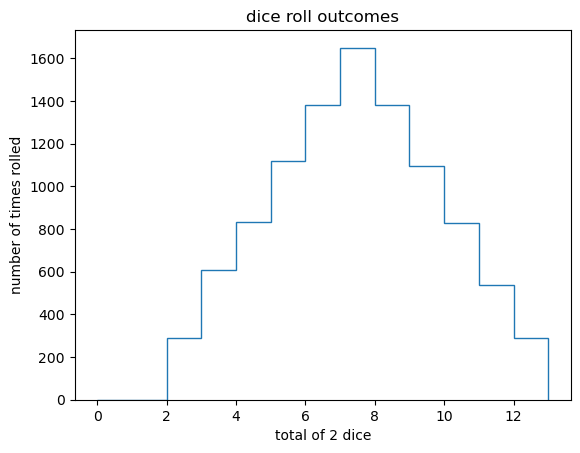

In [1]:
import numpy as np
import matplotlib.pyplot as plt

infile = open('data_files/dice_data.txt', 'r')
total_rolls = []

line = infile.readline()
line = infile.readline()
while len(line) > 1:
    line_arr = line.split(',')
    total = int(line_arr[1]) + int(line_arr[2]) 
    total_rolls.append(total)
    line = infile.readline()

infile.close()

total_arr = np.array(total_rolls)

plt.hist(total_arr, range=(0,13), bins=13, histtype='step')
plt.xlabel('total of 2 dice')
plt.ylabel('number of times rolled')
plt.title('dice roll outcomes')
plt.show()

I'll walk you through each piece of the code above, but there are two things to mention explicitly.

- First, the `total_arr = np.array(total_rolls)` converts the `total_rolls` list into a new type of object called a "numpy array".  The numpy array is an ordered list that has a lot of other functionality built into it.  We don't need to worry about that functionality now, but you should know that `pyplot` works much more smoothly on numpy arrays than it does on lists.  In some cases you can get away with a `list`, but in others you cannot.

- Second, when we call `plt.hist()` we supply the numpy array that contains the data we want to plot *and also* number of formatting arguments.  There is GREAT POWER in these formatting arguments; you should check out the `matplotlib` documentation for much, much more info.  In the block above, we set the display range, number of bins, and type of histogram.  Please try changing these values now.

Let's talk about the actual distribution!  It's not very surprising.  There a more combinations that can add up to 7 than there are that can add to 2 or 12, so we see a greater number of 7 rolls.  Nothing shocking here.

#### Warm-up problem

Now change the code above to plot the individual rolls of die 1 and then die 2.  See if you can plot these two histograms on the same canvas/axes.  Is something funky going on?

In [2]:
# warm-up code goes here...

***

A **bar graph** is a type of histogram in which the horizontal axis is not a contuous range, but rather a set of categories.  We can create such a graph very easily with `pyplot` using a dictionary (remember those???):

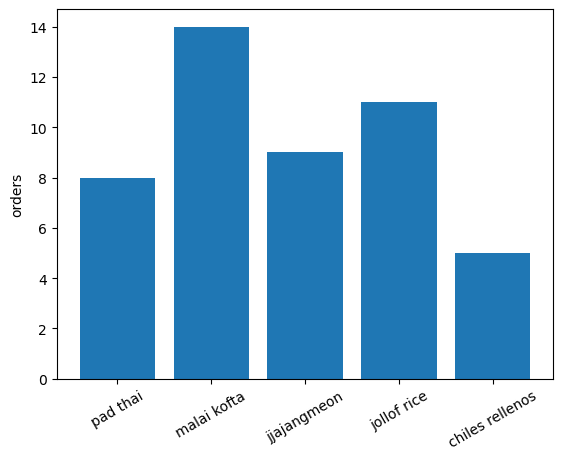

In [3]:
food_dict = {'pad thai': 8, 'malai kofta': 14, 'jjajangmeon': 9, 
             'jollof rice': 11, 'chiles rellenos': 5}

key_arr = list(food_dict.keys())
val_arr = list(food_dict.values())

plt.bar(key_arr, val_arr)
plt.ylabel('orders')
plt.xticks(rotation=30)
plt.show()

***

Histograms are really magical -- they can make a huge amount of data easily digestible .  That said, histograms aren't the only way to visualize 1-d data!

You should note that **2-d histograms** are also a thing!  I'll make one for you below, free of charge :^)

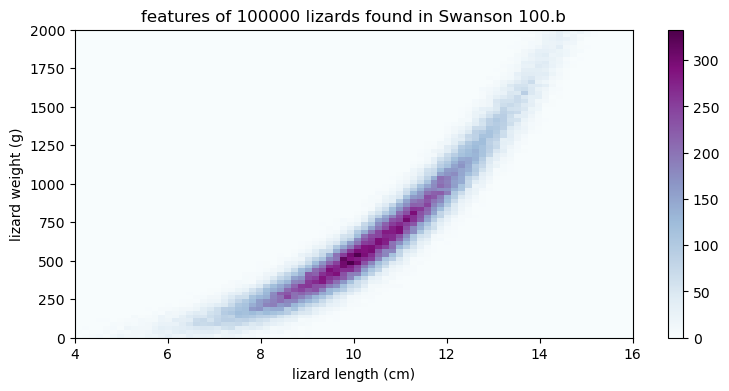

In [4]:
fil = open("data_files/lizards.csv","r")

n_lizards = 0
h, w = [], []
line = fil.readline()
while len(line) > 1:
    n_lizards = n_lizards + 1
    line_arr = line.split(',')
    h.append(float(line_arr[0]))
    w.append(float(line_arr[1]))
    line = fil.readline()

h = np.array(h)
w = np.array(w)

fig = plt.figure(figsize=(9,4))
plt.hist2d(h, w, bins=(80,80), range=[[4,16], [0, 2000]], cmap='BuPu')
# plt.scatter(h, w)
plt.ylabel('lizard weight (g)')
plt.xlabel('lizard length (cm)')
plt.title('features of ' + str(n_lizards) + ' lizards found in Swanson 100.b')
cbar = plt.colorbar()
plt.show()

Holy cats, that looks good!  It's important to point out that all of the business of making this histogram happens in the last seven (!) lines of code of the cell above.  WOW!

* * *

## Graphing bi-variate data (*i.e.*, 2-d graphs)

Bi-variate visualizations, that is visualizations showing the relationship between two variables, seem to be a sweet spot for human comprehension.  This could be for many reasons!  One possible explanation is that we live in 3 spatial dimensions, which makes projections of data onto 2-d surfaces (like paper or screens) fairly easy to do.  Another possible explanation is that until fairly recently, it has been difficult to make graphs of more than two variables and this means we just have more experience digesting 2-d visualizations.  Regardless of *why* we like 2-d visualizations, `matplotlib` makes it quite easy to make them.

Let's take a look at a dataset of deaths in major US cities.  [I know this is morbid, but this is a great example of learning something unexpected from a dataset.]  The block of code below reads in data from a file containing weekly mortality data from major US cities during the period 1962-2016.  It's a lot of data!  Check out the header line in the file for more info.  The code below allows us to select a particular city's data for graphing.

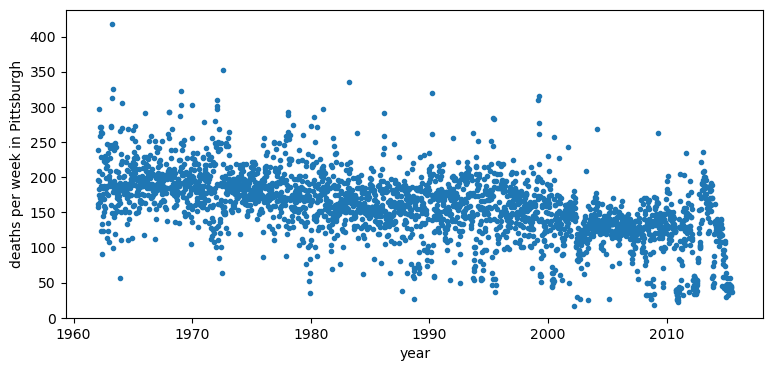

In [5]:
fil = open("data_files/Deaths_in_122_U.S._cities_-_1962-2016.csv","r")

w = []
ds = []

city = "Pittsburgh"

lin = fil.readline()
lin = fil.readline()

datum_index = 7

i = 0
while len(lin) > 2:
    arr = lin.split(",")
    if arr[5] == city and arr[datum_index].isdigit():
        w.append((int(arr[1]) + (int(arr[0]) - 1962)*52)/52.0 + 1962)
        ds.append(float(arr[datum_index]))
    lin = fil.readline()
    i += 1

w = np.array(w)
ds = np.array(ds)

fig = plt.figure(figsize=(9,4))
plt.plot(w, ds,'.')
plt.ylim(ymin=0)
plt.ylabel("deaths per week in " + city)
plt.xlabel("year")
plt.show()

fil.close()

Very interesting!  This is an example of a **time-series** visualization or time-series data -- we're seeing the variation in a quantity versus time.  Change the code above to look at data from other US cities and see if you can formulate some demographic hypotheses!

The above should convince you how important visualization is/can be in the process of doing modern science.  To figure out the programming structures that allow us to do this, let's turn back to our parabolic trajectory data from our last lesson.  The block of code below is very similar to a bit of the previous notebook.

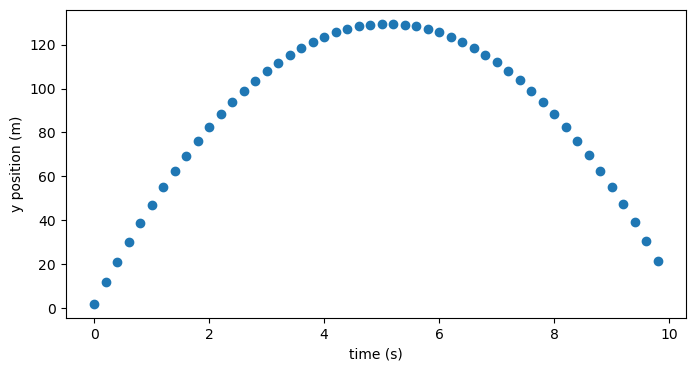

In [6]:
import numpy as np

in_file = open("data_files/parab_t_and_y.txt", "r")
t_list = []
y_list = []
line = in_file.readline()       
while len(line) > 1:            
    line_list = line.split(",") 
    t_list.append(float(line_list[0]))       
    y_list.append(float(line_list[1]))
    line = in_file.readline()
    
# now comes the graphing code!
import matplotlib.pyplot as plt
t_arr = np.array(t_list)         
y_arr = np.array(y_list)         

fig = plt.figure(figsize=(8,4))
plt.plot(t_arr, y_arr, 'o')
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.show()


So, that's how you make a simple plot!  The independent variable quantities are represented by a numpy array (`t_arr`) and the dependent variable quantities are represented by another numpy array (`y_arr`).  The default formatting of the graph is pretty good looking.

I'd like to point out that the third argument of the `plt.plot()` command is the marker properties.  `'o'` is shorthand telling `pyplot` that the points should be represented by circles.  Try changing the formatting string to the following values: `'pb'`, `'sr'`, `'-y'`.  

The `fig = plt.figure(figsize=(8,4))` line in the above code is not strictly necessary for simple plots.  What this does is create a figure object that we will be able to format.  If a line like this is not included before you use `plt.plot...`, `matplotlib` will essentially create a figure with default properties.  I'll show you some of the features of `figure` below.

***

I know what you're thinking: "Wow, this is great and life affirming, but what if I just want to graph a function... this seems like overkill."  Let me show you a basic way to graph a function(s), and then you can decide for yourself.

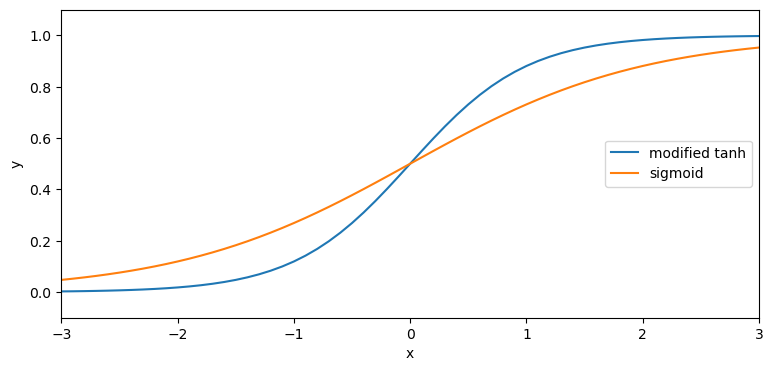

In [7]:
def function1(x):
    return 0.5 * (np.tanh(x) + 1)

def function2(x):
    return 1 - 1 / (1 + np.exp(x))

xlist, f1list, f2list = [], [], []

xmin = -3.0
xmax = 3.0
dx = 0.1
x_val = xmin

while x_val <= xmax + 0.0001:
    xlist.append(x_val)
    f1list.append(function1(x_val))
    f2list.append(function2(x_val))
    x_val += dx

xarray = np.array(xlist)
f1array = np.array(f1list)
f2array = np.array(f2list)

fig = plt.figure(figsize=(9,4))
plt.plot(xarray, f1array, '-', label='modified tanh')
plt.plot(xarray, f2array, '-', label='sigmoid')
plt.xlim(xmin, xmax)
plt.ylim(-0.1,1.1)
plt.ylabel("y")
plt.xlabel("x")
plt.legend(loc='center right')
plt.show()

Yowza, that looks professional.  So, what's going on here is that we generate arrays of x and y values that `pyplot` will then graph.  We can't just tell `pyplot` what the function is and then ask it to make a graph.  This might sound like an extra step, but it gives us a lot of control that we might want to exercise later.

Notice that because these are continuous functions (even though our arrays of values are not continuous) we display them with the points connected.

Also notice that `pyplot` automagically handles a lot of the formatting here!  It puts the second curve on the same set of axes and changes its default color so that we can tell the two functions apart.  The legend is super simple to add, too!

### Subplots

What if we want the two graphs on separate axes right next to one another?  We can create subplots of the figure to put the graphs where we want them.  `subplot` accesses individual elements of a grid of plots.  Let's create a grid with 1 row and 2 columns:

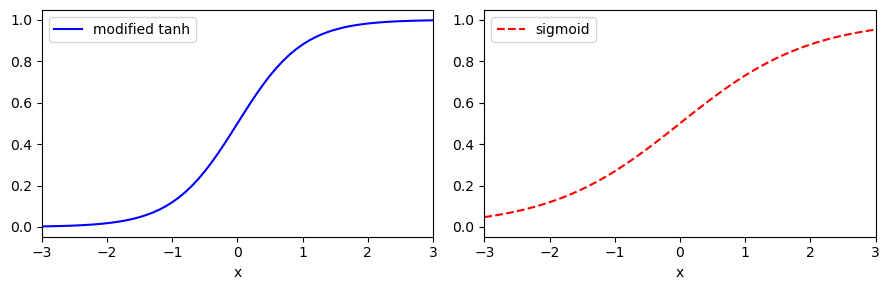

In [8]:
fig = plt.figure(figsize=(9,3))
ax1 = plt.subplot(121)
ax1.plot(xarray, f1array, '-b', label='modified tanh')
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel('x')
ax1.legend()

ax2 = plt.subplot(122, sharey=ax1, sharex=ax1)
ax2.plot(xarray, f2array, '--r', label='sigmoid')
ax2.set_xlabel('x')
ax2.legend()

plt.tight_layout()
plt.show()

* * *

## Error bars

This class is about applying computation to scientific research.
Scientific research is based on predictions and measurements.
Predictions and measurements have associated with them precision or uncertainty or "error".
Thus, we need to be able to visualize uncertainty/error.
In a bivariate visualization of discrete data points this is typically done with error bars.  Uncertainty visualization will be *essential* for what we'll do in the next lesson.

Where do these uncertainties come from?  Keep in mind that any measuring device (instrument) has a limited precision.  When we display a data point indicating, for example, a length measurement done with a ruler with precision $\pm$1 cm, we would include an error bar that extends 1 cm on either side of the data point.  This error bar indicates to the viewer that we're confident that the *actual* value of the measured quantity is within the range indicated by the error bar.  Most often it is these measurement uncertainties that are the sources of uncertainty in an analysis, though there are other ways that uncertainty can enter an analysis.

If you've ever used Excel (or similar) to make a graph with error bars, you know that it's a bit clunky.  Not so in `pyplot`!  The block of code below reads in a parabola data file that includes $t$ and $y$ uncertainties.  If these are contained in a file or can be generated as arrays, then visualizing them is very easy to do.

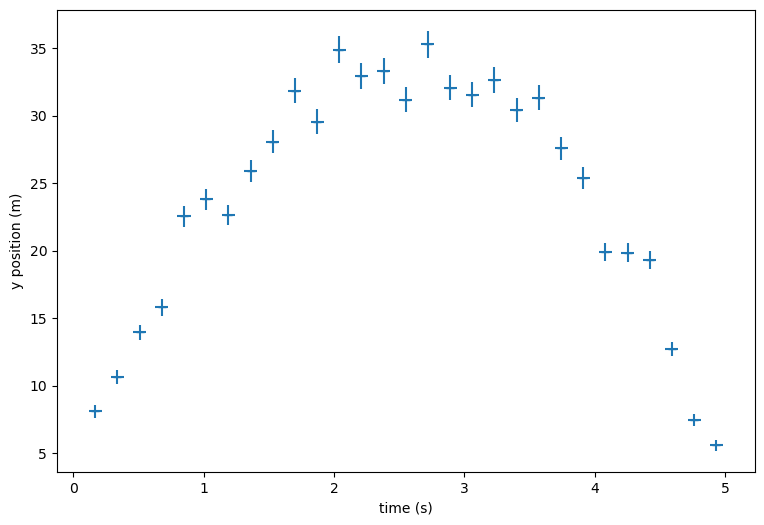

In [9]:
in_file = open("data_files/parab_t_and_y_error.csv", "r")
t_list, et_list, y_list, ey_list = [], [], [], [] 

line = in_file.readline() # read off header line
line = in_file.readline()
while len(line) > 1:
    line_list = line.split(",")

    t_list.append(float(line_list[0]))      
    et_list.append(float(line_list[1]))

    y_list.append(float(line_list[2]))
    ey_list.append(float(line_list[3]))

    line = in_file.readline()
    
t_arr = np.array(t_list)
y_arr = np.array(y_list)
et_arr = np.array(et_list)
ey_arr = np.array(ey_list)

fig = plt.figure(figsize=(9, 6))
plt.errorbar(t_arr, y_arr, xerr=et_arr, yerr=ey_arr, fmt='_')
plt.xlabel('time (s)')
plt.ylabel('y position (m)')
plt.show()

The crosses in the plot above are NOT just markers!  There is information contained in the lengths of the error bars.  We'll talk about how we use that information in the next lesson.

What can you learn from these position *vs* time measurements by looking at the graph?

* * *

## Higher dimensions

We've mostly been living in 2-d in this notebook.  Histograms allowed us to visualize 1-d data in 2-d. Bi-variate graphs visualize 2-d data in 2-d.  What if our data has more features/dimensions?  What do we do?  Holograms?  Metaverse?

One thing that we could do is project a 3-d visualization into 2 dimensions.  Picture a trajectory of a particle in 3 dimensions projected onto a 2-dimensional screen... you know, like a video game!  You can check out `plot3d` and `scatter3d` if you're interested in projections like this.

We can actually cram a lot more information into a 2-d graph than afforded by the horizontal and vertical axes!  Think about how many different types of information were shown in the Minard graphic at the top of this notebook.  We can control other features of a graph such as marker shape, size, and color to convey information.  Using `pyplot` you have tons of control over these features.  Here's a simple example:

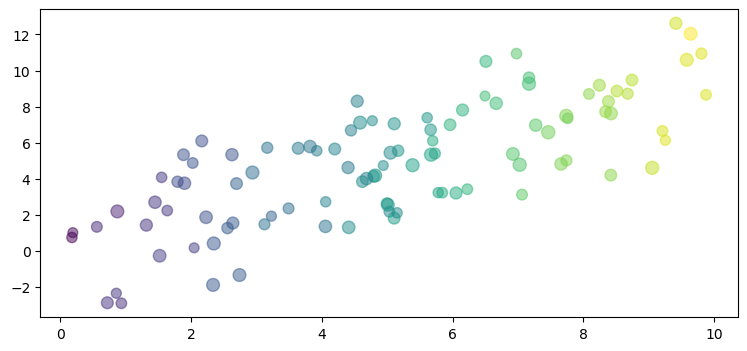

In [10]:
x_list, y_list, c_list, r_list = [], [], [], []
for i in range(100):
    x_list.append(np.random.rand() * 10)
    y_list.append(x_list[-1] + np.random.randn()* 2)
    c_list.append(x_list[-1]/10 + np.random.rand() * 0.1) #np.random.rand(N)
    r_list.append(50.0 + 40 * np.random.rand())

fig = plt.figure(figsize=(9,4))
plt.scatter(x_list, y_list, s=r_list, c=c_list, alpha=0.5)
plt.show()

The data here is meaningless, but one of your future projects will be to make a scatter plot that displays 3 or more dimensions of information. 

* * *

## Problems

Your homework is to complete 3 of the following problems.  

### Regulars
1. Return to he NBA dataset from the previous lesson.  Make a histogram of the final point differentials (team2 - team1) for all games from the dataset.  Your histogram should be divided into 1-point bins.  What is the most common final point differential (*i.e.*, the *mode*)?
1. Return to the dice roll data from Lesson 3 problem set.  Make histograms of the total dice rolls *for each* croupier.  Display the two histograms on the same axes.
1. The file `mammal_body_brain_masses_dataset.csv` contains average body and brain masses for different species of mammal (duh).  Add a column the file that contains whether the animals are quadrupedal or bipedal (you can do this in (gasp) Excel). Make a scatter plot of brain mass *vs* body mass with marker colors that indicate whether the animals are bipedal or quadrupedal.
1. Return to the NBA data.  Make a scatter plot of final point differential (team2 - team1) *vs* half-time point differential (team2 - team1).  (I can't wait to see what this looks like.)  What hypotheses does your graph suggest?

### Semi-meanies
5. Return to the dice roll data from Lesson 3 problem set.  Make histograms of the individual die rolls of the two croupiers (4 histograms in total).  Is something funky going on?

### Meanies
6. Return the NBA data.  Make a scatter plot of team1's final score *vs* team2's final score.  The point markers should be colored according to the point differential (team2 - team1) at halftime.
6. Return to the NBA data.  For each season, compute the average final point differential (team2 - team1) and the standard deviation of point differential.  Then, make a graph of average point differential *vs* year with vertical error bars that indicate the standard deviation.
6. Find an interesting dataset and make a graph that shows an interesting relationship between (at least two) interesting quantities.
